In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
# from keras.datasets import mnist
# from keras.datasets import imdb
# from keras.datasets import reuters
from keras.datasets import boston_housing

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from keras.utils.np_utils import to_categorical

plt.style.use('ggplot')

%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
# Normalise data
train_mean_x = train_data.mean(axis=0)
x_train = train_data - train_mean_x

train_std_x = train_data.std(axis=0)
x_train = x_train / train_std_x

x_test = test_data - train_mean_x
x_test = x_test / train_std_x

In [6]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,
                           activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,
                           activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [7]:
# k fold validation

k = 4 
num_val_samples = len(x_train)//4
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold # ',i)
    val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
    
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
    [x_train[:i*num_val_samples],
     x_train[(i+1)*num_val_samples:]],axis=0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model = build_model()
    
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=1)
    val_mse,val_mae = model.evaluate(val_data, 
                                     val_targets, 
                                     verbose = 1)
    all_scores.append(val_mae)
    

processing fold #  0
Epoch 1/100
303/303 [==============================] - 2s 5ms/step - loss: 202.2597 - mean_absolute_error: 10.7680
Epoch 2/100
303/303 [==============================] - 1s 2ms/step - loss: 30.5381 - mean_absolute_error: 3.8535
Epoch 3/100
303/303 [==============================] - 1s 2ms/step - loss: 21.5220 - mean_absolute_error: 3.1953
Epoch 4/100
303/303 [==============================] - 1s 2ms/step - loss: 18.4315 - mean_absolute_error: 2.9146
Epoch 5/100
303/303 [==============================] - 1s 2ms/step - loss: 16.7984 - mean_absolute_error: 2.6755
Epoch 6/100
303/303 [==============================] - 1s 2ms/step - loss: 15.6811 - mean_absolute_error: 2.5803
Epoch 7/100
303/303 [==============================] - 1s 2ms/step - loss: 14.3911 - mean_absolute_error: 2.5433
Epoch 8/100
303/303 [==============================] - 1s 2ms/step - loss: 14.0641 - mean_absolute_error: 2.4283
Epoch 9/100
303/303 [==============================] - 1s 2ms/step - loss

303/303 [==============================] - 1s 2ms/step - loss: 7.6346 - mean_absolute_error: 1.8082
Epoch 45/100
303/303 [==============================] - 1s 2ms/step - loss: 7.0655 - mean_absolute_error: 1.7260
Epoch 46/100
303/303 [==============================] - 1s 2ms/step - loss: 7.5165 - mean_absolute_error: 1.7561
Epoch 47/100
303/303 [==============================] - 1s 2ms/step - loss: 7.9311 - mean_absolute_error: 1.7751
Epoch 48/100
303/303 [==============================] - 1s 2ms/step - loss: 7.9596 - mean_absolute_error: 1.7588
Epoch 49/100
303/303 [==============================] - 1s 2ms/step - loss: 7.5143 - mean_absolute_error: 1.7542
Epoch 50/100
303/303 [==============================] - 1s 3ms/step - loss: 7.3919 - mean_absolute_error: 1.7362
Epoch 51/100
303/303 [==============================] - 1s 2ms/step - loss: 7.5334 - mean_absolute_error: 1.7165
Epoch 52/100
303/303 [==============================] - 1s 3ms/step - loss: 7.1291 - mean_absolute_error: 1.7

303/303 [==============================] - 1s 2ms/step - loss: 4.5571 - mean_absolute_error: 1.4691
Epoch 88/100
303/303 [==============================] - 1s 2ms/step - loss: 4.1250 - mean_absolute_error: 1.4251
Epoch 89/100
303/303 [==============================] - 1s 2ms/step - loss: 4.1930 - mean_absolute_error: 1.3709
Epoch 90/100
303/303 [==============================] - 1s 3ms/step - loss: 4.4579 - mean_absolute_error: 1.4777
Epoch 91/100
303/303 [==============================] - 1s 3ms/step - loss: 4.4244 - mean_absolute_error: 1.4640
Epoch 92/100
303/303 [==============================] - 1s 2ms/step - loss: 4.0011 - mean_absolute_error: 1.4252
Epoch 93/100
303/303 [==============================] - 1s 3ms/step - loss: 4.0130 - mean_absolute_error: 1.3730
Epoch 94/100
303/303 [==============================] - 1s 3ms/step - loss: 4.0244 - mean_absolute_error: 1.4356
Epoch 95/100
303/303 [==============================] - 1s 2ms/step - loss: 4.3152 - mean_absolute_error: 1.4

In [8]:
all_scores

[1.9723864829186166,
 2.2028323683408226,
 2.9240974152442254,
 2.1946738202973166]

In [9]:
np.mean(all_scores)

2.3234975217002454

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [11]:
#  newer model with 500 epochs
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #',i)
    val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
    [x_train[:i*num_val_samples],
     x_train[(i+1)*num_val_samples:]],
     axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]],
     axis = 0)
    
    model1 = build_model()
    
    history = model1.fit(partial_train_data,partial_train_targets,
                   validation_data=(val_data, val_targets),
                   epochs=num_epochs,
                   batch_size=1,
                   verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


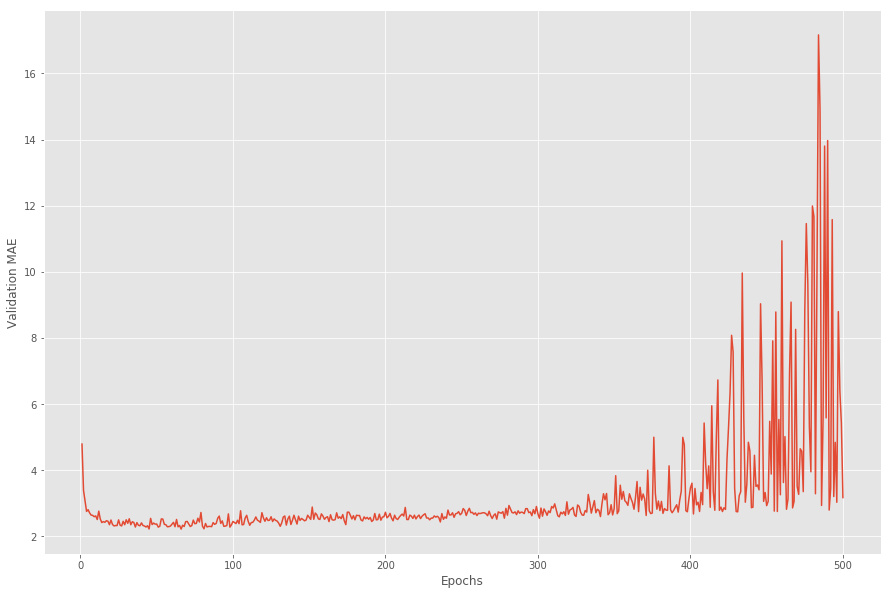

In [12]:
# mean of k-fold validation scires
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) 
                       for i in range(num_epochs)]

plt.figure(figsize=(15,10))
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE');

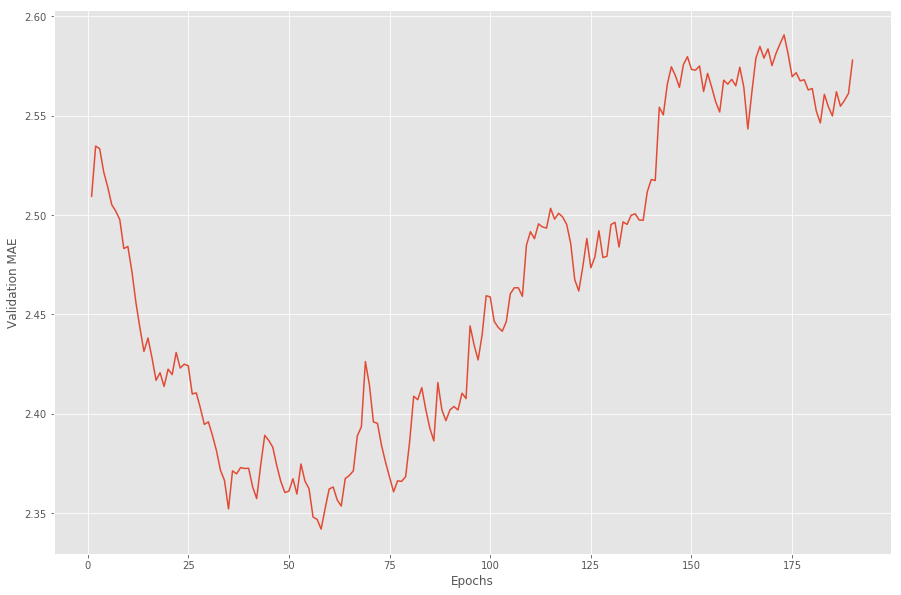

In [18]:
# plot excluding first 10 points and exponential moving average

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    
    for point in points:
        
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:200])

plt.figure(figsize=(15,10))
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [19]:
# changed batch size

#  newer model with 500 epochs
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #',i)
    val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate(
    [x_train[:i*num_val_samples],
     x_train[(i+1)*num_val_samples:]],
     axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]],
     axis = 0)
    
    model1 = build_model()
    
    history = model1.fit(partial_train_data,partial_train_targets,
                   validation_data=(val_data, val_targets),
                   epochs=num_epochs,
                   batch_size=24,
                   verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


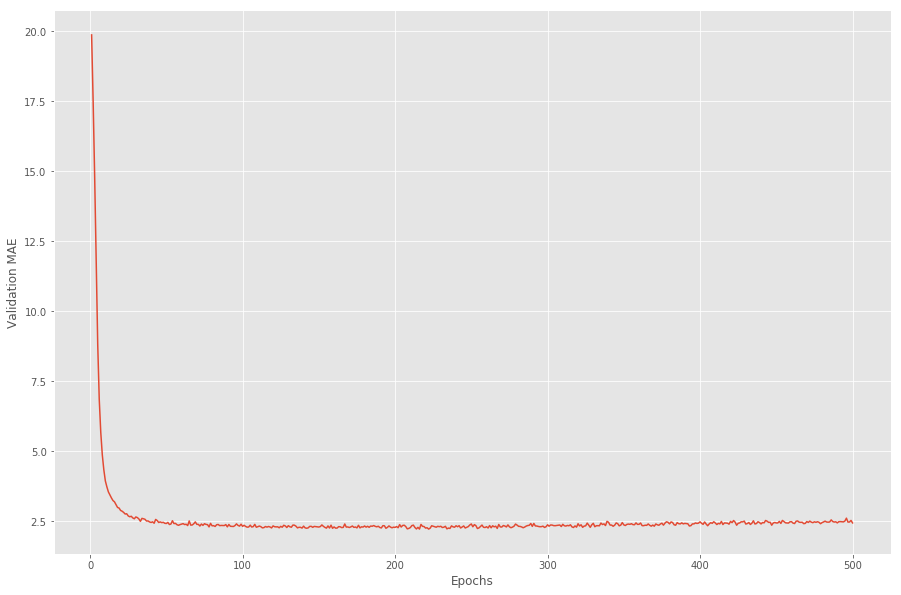

In [32]:
# mean of k-fold validation scires
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) 
                       for i in range(num_epochs)]

plt.figure(figsize=(15,10))
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE');

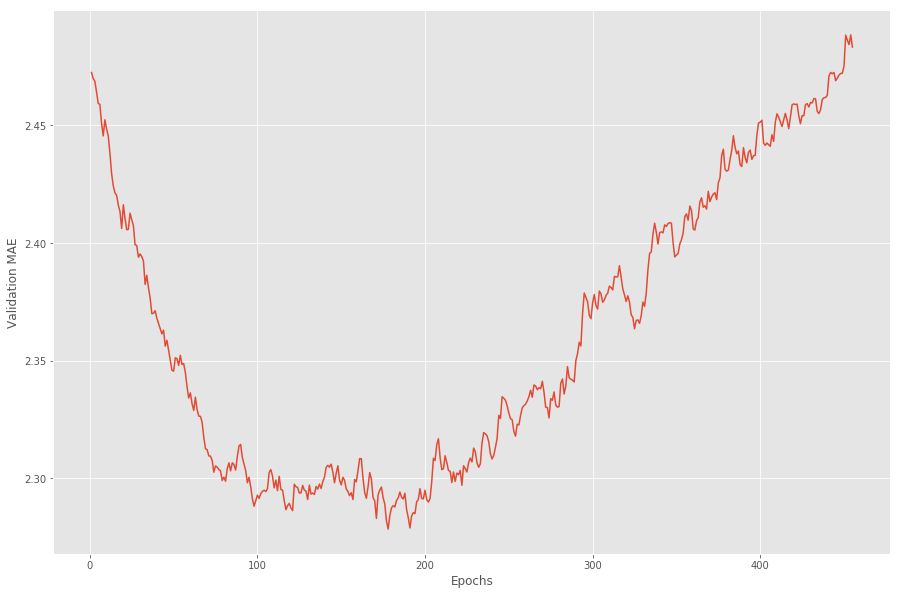

In [35]:
# plot excluding first 10 points and exponential moving average

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    
    for point in points:
        
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[20:])

plt.figure(figsize=(15,10))
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()